In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.express as px

In [3]:
pd.pandas.set_option('display.max_rows', 60)
pd.pandas.set_option('display.max_columns', 1000)

In [4]:
rdf = pd.read_csv('Zomato Restaurants DataFrame - Clean & FeatEng.csv', index_col=False)

In [5]:
rdf.head()

Restaurant Name Restaurant Area  Restaurant Rating  Review Counts  \
0        Holy Smokes        Senopati                4.4           1437   
1     Pempek Megaria          Cikini                4.3            461   
2      Tjikinii Lima          Cikini                4.0            391   
3  Gado-Gado Bon-Bin          Cikini                4.0            177   
4      Koffie Fictie  Bekasi Selatan                1.5              1   

   Latitude   Longitude                                            Website  \
0 -6.239143  106.807954  https://www.zomato.com/id/jakarta/holy-smokes-...   
1 -6.199900  106.843739  https://www.zomato.com/id/jakarta/pempek-megar...   
2 -6.189802  106.837150  https://www.zomato.com/id/jakarta/tjikinii-lim...   
3 -6.192959  106.838377  https://www.zomato.com/id/jakarta/gado-gado-bo...   
4 -6.272059  106.970932  https://www.zomato.com/id/jakarta/koffie-ficti...   

                                  Restaurant Address  Price for 2  \
0    Jl. Wolter Monginsidi No. 27, Senopati, Jakarta       500000   
1  Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...        70000   
2          Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
3                Jl. Cikini 4 No. 5, Cikini, Jakarta        90000   
4  Grand Galaxy Park, Ruko RSOD No. 026, Jl. Lotu...       100000   

                                     Additional Info     Province  \
0  ['Di dalam ruangan', 'Hanya Wine dan Bir', 'Pa...  DKI Jakarta   
1       ['Bawa Pulang Tersedia', 'Di dalam ruangan']  DKI Jakarta   
2  ['Ruang Pribadi Tersedia', 'Tempat duduk di lu...  DKI Jakarta   
3       ['Bawa Pulang Tersedia', 'Di dalam ruangan']  DKI Jakarta   
4       ['Bawa Pulang Tersedia', 'Di dalam ruangan']   Jawa Barat   

              City District/Kecamatan Delivery Service     NEW Place Type  \
0  Jakarta Selatan     Kebayoran Baru               No  ['Casual Dining']   
1    Jakarta Pusat            Menteng               No    ['Quick Bites']   
2    Jakarta Pusat            Menteng               No  ['Casual Dining']   
3    Jakarta Pusat            Menteng               No    ['Quick Bites']   
4      Bekasi Kota     Bekasi Selatan               No           ['Kafe']   

  NEW Cuisine Regionality              NEW Cuisines  
0               ['Barat']  ['Grill House', 'Steak']  
1           ['Palembang']                ['Pempek']  
2  ['Indonesia', 'Barat']   ['Unspecified Cuisine']  
3   ['Jawa', 'Indonesia']         ['Makanan Sehat']  
4  ['Unspecified Region']                  ['Kopi']

In [6]:
rdf.rename(columns={'Review Counts':'Restaurant Review', 'NEW Cuisine Regionality':'Cuisine Regionality', 'NEW Place Type': 'Place Type', 'NEW Cuisines':'Cuisines'}, inplace=True)

In [7]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant Name      11267 non-null  object 
 1   Restaurant Area      11267 non-null  object 
 2   Restaurant Rating    11267 non-null  float64
 3   Restaurant Review    11267 non-null  int64  
 4   Latitude             11267 non-null  float64
 5   Longitude            11267 non-null  float64
 6   Website              11267 non-null  object 
 7   Restaurant Address   11267 non-null  object 
 8   Price for 2          11267 non-null  int64  
 9   Additional Info      11267 non-null  object 
 10  Province             11267 non-null  object 
 11  City                 11267 non-null  object 
 12  District/Kecamatan   11267 non-null  object 
 13  Delivery Service     11267 non-null  object 
 14  Place Type           11267 non-null  object 
 15  Cuisine Regionality  11267 non-null 

In [8]:
rdf.shape

(11267, 17)

In [9]:
rdf.head()

Restaurant Name Restaurant Area  Restaurant Rating  Restaurant Review  \
0        Holy Smokes        Senopati                4.4               1437   
1     Pempek Megaria          Cikini                4.3                461   
2      Tjikinii Lima          Cikini                4.0                391   
3  Gado-Gado Bon-Bin          Cikini                4.0                177   
4      Koffie Fictie  Bekasi Selatan                1.5                  1   

   Latitude   Longitude                                            Website  \
0 -6.239143  106.807954  https://www.zomato.com/id/jakarta/holy-smokes-...   
1 -6.199900  106.843739  https://www.zomato.com/id/jakarta/pempek-megar...   
2 -6.189802  106.837150  https://www.zomato.com/id/jakarta/tjikinii-lim...   
3 -6.192959  106.838377  https://www.zomato.com/id/jakarta/gado-gado-bo...   
4 -6.272059  106.970932  https://www.zomato.com/id/jakarta/koffie-ficti...   

                                  Restaurant Address  Price for 2  \
0    Jl. Wolter Monginsidi No. 27, Senopati, Jakarta       500000   
1  Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...        70000   
2          Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
3                Jl. Cikini 4 No. 5, Cikini, Jakarta        90000   
4  Grand Galaxy Park, Ruko RSOD No. 026, Jl. Lotu...       100000   

                                     Additional Info     Province  \
0  ['Di dalam ruangan', 'Hanya Wine dan Bir', 'Pa...  DKI Jakarta   
1       ['Bawa Pulang Tersedia', 'Di dalam ruangan']  DKI Jakarta   
2  ['Ruang Pribadi Tersedia', 'Tempat duduk di lu...  DKI Jakarta   
3       ['Bawa Pulang Tersedia', 'Di dalam ruangan']  DKI Jakarta   
4       ['Bawa Pulang Tersedia', 'Di dalam ruangan']   Jawa Barat   

              City District/Kecamatan Delivery Service         Place Type  \
0  Jakarta Selatan     Kebayoran Baru               No  ['Casual Dining']   
1    Jakarta Pusat            Menteng               No    ['Quick Bites']   
2    Jakarta Pusat            Menteng               No  ['Casual Dining']   
3    Jakarta Pusat            Menteng               No    ['Quick Bites']   
4      Bekasi Kota     Bekasi Selatan               No           ['Kafe']   

      Cuisine Regionality                  Cuisines  
0               ['Barat']  ['Grill House', 'Steak']  
1           ['Palembang']                ['Pempek']  
2  ['Indonesia', 'Barat']   ['Unspecified Cuisine']  
3   ['Jawa', 'Indonesia']         ['Makanan Sehat']  
4  ['Unspecified Region']                  ['Kopi']

In [10]:
def convert_list(row, name): 
    stripped = row[name].strip("[]")
    splitted = list(stripped.split(", "))
    final = [letter.strip("'") for letter in splitted]
    return final

In [11]:
rdf['Place Type'] = rdf.apply(lambda row: convert_list(row, 'Place Type'), axis=1)
rdf['Cuisines'] = rdf.apply(lambda row: convert_list(row, 'Cuisines'), axis=1)
rdf['Cuisine Regionality'] = rdf.apply(lambda row: convert_list(row, 'Cuisine Regionality'), axis=1)
rdf['Additional Info'] = rdf.apply(lambda row: convert_list(row, 'Additional Info'), axis=1)

In [12]:
reviewcondition = (rdf['Restaurant Review'] == 0) | (rdf['Restaurant Review'] == 1)
pricecondition = (rdf['Price for 2'] == 0)
areajktcondition = ~(rdf['Province'] == 'DKI Jakarta')

In [13]:
#Let's check again how many entries that don't fulfill review/rating condition

print("Restaurants don't fulfill Review / Rating Criteria :")
print(sum(reviewcondition), round(sum(reviewcondition)*100/rdf.shape[0],2), "%")
print("Restaurants's Price is not listed :")
print(sum(pricecondition), round(sum(pricecondition)*100/rdf.shape[0],2), "%")
print("Restaurants don't fufill Review/Rating & Price Criteria")
print(rdf[reviewcondition | pricecondition].shape[0], round(100*rdf[reviewcondition | pricecondition].shape[0]/rdf.shape[0],2), "%")

Restaurants don't fulfill Review / Rating Criteria :
4473 39.7 %
Restaurants's Price is not listed :
56 0.5 %
Restaurants don't fufill Review/Rating & Price Criteria
4483 39.79 %


In [14]:
#Make A New DataFrame without those data because we still have enough data (6500+ / 60%+) to make the model

rdf = rdf[~(reviewcondition | pricecondition)].reset_index(drop=True)

# REVISIT FEATURE ENGINEERING

# 1. CUISINES & CUISINE REGIONALITY

In [15]:
cuisinecondition = (rdf['Cuisines'].apply(lambda x: 'Unspecified Cuisine' in x))
regioncondition = (rdf['Cuisine Regionality'].apply(lambda x: 'Unspecified Region' in x))

In [16]:
#Let's check again how many entries that has 'Unspecified' in their Cuisines and Cuisine Regionality

print("Restaurants that have 'Unscpecified Cuisine' :")
print(sum(cuisinecondition), round(sum(cuisinecondition)*100/rdf.shape[0],2), "%")
print("Restaurants that have 'Unspecified Region :")
print(sum(regioncondition), round(sum(regioncondition)*100/rdf.shape[0],2), "%")
print("Restaurants that have 'Unspecified Cuisine OR Unspecified Region")
print(rdf[cuisinecondition | regioncondition].shape[0], round(100*rdf[cuisinecondition | regioncondition].shape[0]/rdf.shape[0],2), "%")

Restaurants that have 'Unscpecified Cuisine' :
2197 32.39 %
Restaurants that have 'Unspecified Region :
587 8.65 %
Restaurants that have 'Unspecified Cuisine OR Unspecified Region
2768 40.8 %


In [17]:
rdf[cuisinecondition | regioncondition]['City'].value_counts()

Jakarta Selatan        775
Jakarta Pusat          412
Jakarta Utara          394
Jakarta Barat          361
Tangerang Selatan      144
Tangerang Kabupaten    132
Jakarta Timur          109
Bogor Kota             100
Bekasi Kota             94
Depok                   93
Tangerang Kota          88
Bogor Kabupaten         61
Cianjur                  4
Tangerang                1
Name: City, dtype: int64

In [18]:
province_list = list(rdf['City'].unique())
city_list = list(rdf['City'].unique())

In [19]:
#Let's check the Unique Values of Cuisine Type & Cuisine Regionality

cuisine_type = []
rgn_type = []

#Type = List
for index, row in rdf.iterrows():
    csne = row['Cuisines']
    cuisine_type.extend(csne)
    rgn = row['Cuisine Regionality']
    rgn_type.extend(rgn)

cuisine_type = list(set(cuisine_type))
rgn_type = list(set(rgn_type))

# 1.1. FINDING THE MODE VALUE for CUISINES

In [20]:
cuisine_type.remove("Unspecified Cuisine")

In [21]:
len(cuisine_type)

35

In [22]:
# Make A New List to store the Restaurant Type Counts

idx = 1
cuisine_type_ct = []
city_list_rev = []

# Type = List
for i in city_list:

    for j in range(idx, idx+35):
        city_list_rev.append(i)
    idx += 35

    for k in cuisine_type:
        count = sum(rdf[rdf['City'] == i]['Cuisines'].apply(lambda x: k in x))
        cuisine_type_ct.append(count)


cuisine_type_rev = cuisine_type*len(city_list)

In [23]:
area_cuisine = pd.DataFrame({'City/Province': city_list_rev, 'Cuisines': cuisine_type_rev, 'Cuisines Count': cuisine_type_ct})

In [24]:
area_cuisine.sort_values(by = ['City/Province', 'Cuisines Count'], ascending=False).groupby(['City/Province']).first()

Cuisines  Cuisines Count
City/Province                               
Bekasi Kabupaten     Minuman               9
Bekasi Kota             Kopi              77
Bogor Kabupaten         Kopi              21
Bogor Kota              Kopi              56
Cianjur              Seafood               1
Depok                   Kopi              65
Jakarta Barat           Kopi             152
Jakarta Pusat           Kopi             113
Jakarta Selatan         Kopi             446
Jakarta Timur           Kopi              90
Jakarta Utara           Kopi             146
Tangerang            Seafood               0
Tangerang Kabupaten     Kopi              69
Tangerang Kota          Kopi              43
Tangerang Selatan       Kopi             110

We can't really use data for 'Bekasi Kabupaten', 'Cianjur', 'Tangerang' because the mode value is really low (0-10)

We'll use the data from their province instead

In [25]:
print(rdf[rdf['City'] == 'Bekasi Kabupaten']['Province'].unique())
print(rdf[rdf['City'] == 'Cianjur']['Province'].unique())
print(rdf[rdf['City'] == 'Tangerang']['Province'].unique())

['Jawa Barat']
['Jawa Barat']
['Banten']


In [26]:
province_list = ['Jawa Barat', 'Banten']

In [27]:
# Make A New List to store the Restaurant Type Counts

idx = 1
cuisine_type_ct = []
province_list_rev = []

# Type = List
for i in province_list:

    for j in range(idx, idx+35):
        province_list_rev.append(i)
    idx += 35

    for k in cuisine_type:
        count = sum(rdf[rdf['Province'] == i]['Cuisines'].apply(lambda x: k in x))
        cuisine_type_ct.append(count)

cuisine_type_rev = cuisine_type*len(province_list)

In [28]:
area_cuisine2 = pd.DataFrame({'City/Province': province_list_rev, 'Cuisines': cuisine_type_rev, 'Cuisines Count': cuisine_type_ct})

In [29]:
area_cuisine2.sort_values(by = ['City/Province', 'Cuisines Count'], ascending=False).groupby(['City/Province']).first()

Cuisines  Cuisines Count
City/Province                         
Banten            Kopi             222
Jawa Barat        Kopi             229

# 1.2. FINDING THE MODE VALUE for CUISINE REGIONALITY

In [30]:
rgn_type.remove("Unspecified Region")

In [31]:
len(rgn_type)

54

In [32]:
# Make A New List to store the Restaurant Type Counts

idx = 1
city_list_rev = []
rgn_type_ct = []

# Type = List
for i in city_list:

    for j in range(idx, idx+54):
        city_list_rev.append(i)
    idx += 54

    for k in rgn_type:
        count = sum(rdf[rdf['City'] == i]['Cuisine Regionality'].apply(lambda x: k in x))
        rgn_type_ct.append(count)


rgn_type_rev = rgn_type*len(city_list)

In [33]:
area_regionality = pd.DataFrame({'City/Province': city_list_rev, 'Cuisine Regionality': rgn_type_rev, 'Regionality Count': rgn_type_ct})

In [34]:
area_regionality.sort_values(by = ['City/Province', 'Regionality Count'], ascending=False).groupby(['City/Province']).first()

Cuisine Regionality  Regionality Count
City/Province                                             
Bekasi Kabupaten              No Region                  9
Bekasi Kota                   Indonesia                160
Bogor Kabupaten               Indonesia                 97
Bogor Kota                    Indonesia                289
Cianjur                       Indonesia                  9
Depok                         Indonesia                123
Jakarta Barat                 Indonesia                506
Jakarta Pusat                 Indonesia                330
Jakarta Selatan               Indonesia                707
Jakarta Timur                 Indonesia                202
Jakarta Utara                 Indonesia                330
Tangerang                       Chinese                  1
Tangerang Kabupaten           Indonesia                105
Tangerang Kota                Indonesia                 93
Tangerang Selatan             Indonesia                247

We can't really use data from 'Bekasi Kabupaten', 'Cianjur', 'Tangerang' because the move value is really low (0-10)

We'll use the data from their province instead

In [35]:
# Make A New List to store the Restaurant Type Counts

idx = 1
province_list_rev = []
rgn_type_ct = []

# Type = List
for i in province_list:

    for j in range(idx, idx+54):
        province_list_rev.append(i)
    idx += 54

    for k in rgn_type:
        count = sum(rdf[rdf['Province'] == i]['Cuisine Regionality'].apply(lambda x: k in x))
        rgn_type_ct.append(count)


rgn_type_rev = rgn_type*len(province_list)

In [36]:
area_regionality2 = pd.DataFrame({'City/Province': province_list_rev, 'Cuisine Regionality': rgn_type_rev, 'Regionality Count': rgn_type_ct})

In [37]:
area_regionality2.sort_values(by = ['City/Province', 'Regionality Count'], ascending=False).groupby(['City/Province']).first()

Cuisine Regionality  Regionality Count
City/Province                                       
Banten                  Indonesia                445
Jawa Barat              Indonesia                681

# 1.3. IMPUTING UNSCPECIFIED VALUES

In [38]:
impute_csne = rdf[cuisinecondition].index

In [39]:
def cuisine_imputer(row):
    entry = row['Cuisines']
    entry.append("Kopi")
    entry.remove("Unspecified Cuisine")
    return entry

In [40]:
rdf[cuisinecondition]['Cuisines'] = rdf[cuisinecondition].apply(lambda row: cuisine_imputer(row), axis=1)

In [41]:
rdf[cuisinecondition]

Restaurant Name     Restaurant Area  \
2                                Tjikinii Lima              Cikini   
7                                      A Siang          Cengkareng   
11                         Nasi Uduk Mpok Iyoh       Ciputat Timur   
17    Lagoon Lounge - The Sultan Hotel Jakarta             Senayan   
18                                  Waroeng KG      Kec. Tangerang   
...                                        ...                 ...   
6769                                 Open Door       Tanjung Duren   
6772                            Warung Cianjur       Serpong Utara   
6776                         Akai 45 Law Fu Ce  Pantai Indah Kapuk   
6779                    Nock Nock Cafe & Resto       Kelapa Gading   
6782                             Talaga Kuring              Sentul   

      Restaurant Rating  Restaurant Review  Latitude   Longitude  \
2                   4.0                391 -6.189802  106.837150   
7                   3.9                  7 -6.139209  106.725797   
11                  3.9                 36 -6.299995  106.761931   
17                  3.9                  6 -6.216584  106.810099   
18                  3.9                  4 -6.182252  106.661048   
...                 ...                ...       ...         ...   
6769                3.6                149 -6.176591  106.789170   
6772                2.0                  4 -6.245244  106.612075   
6776                3.1                 18 -6.093435  106.743105   
6779                2.3                 13 -6.151773  106.891750   
6782                2.1                 30 -6.575514  106.864451   

                                                Website  \
2     https://www.zomato.com/id/jakarta/tjikinii-lim...   
7     https://www.zomato.com/id/jakarta/a-siang-ceng...   
11    https://www.zomato.com/id/jakarta/nasi-uduk-mp...   
17    https://www.zomato.com/id/jakarta/lagoon-loung...   
18    https://www.zomato.com/id/jakarta/waroeng-kg-k...   
...                                                 ...   
6769  https://www.zomato.com/id/jakarta/open-door-ta...   
6772  https://www.zomato.com/id/jakarta/warung-cianj...   
6776  https://www.zomato.com/id/jakarta/akai-45-law-...   
6779  https://www.zomato.com/id/jakarta/nock-nock-ca...   
6782  https://www.zomato.com/id/jakarta/talaga-kurin...   

                                     Restaurant Address  Price for 2  \
2             Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
7     Ruko Taman Palem Lestari, Blok B16 No. 9, Jl. ...        65000   
11        Jl. Pahlawan No. 95, Ciputat Timur, Tangerang       100000   
17    The Sultan Hotel Jakarta, Jl. Gatot Subroto, S...       350000   
18    Ruko Permata Niaga 1, Jl. Taman Royal, Cipondo...        50000   
...                                                 ...          ...   
6769  Apartemen Royal Mediterania Garden, Lobby Utam...       200000   
6772  Ruko Blitz, Blok A No. 21, Jl. Gading Serpong,...        90000   
6776  Food Street PIK 2, Jl. Pantai Indah Kapuk, Pan...       120000   
6779  Mall of Indonesia, Rukan Resort City Home, Blo...       120000   
6782  Komplek Graha Utama, Jl. Bukit Sentul, Sentul,...       250000   

                                        Additional Info     Province  \
2     [Ruang Pribadi Tersedia, Tempat duduk di luar,...  DKI Jakarta   
7     [Bawa Pulang Tersedia, Di dalam ruangan, Sarap...  DKI Jakarta   
11             [Bawa Pulang Tersedia, Di dalam ruangan]       Banten   
17    [Sarapan, Di dalam ruangan, Hanya Wine dan Bir...  DKI Jakarta   
18    [Bawa Pulang Tersedia, Sarapan, Di dalam ruangan]       Banten   
...                                                 ...          ...   
6769  [Di dalam ruangan, Hanya Wine dan Bir, Parkir ...  DKI Jakarta   
6772                               [No Additional Info]       Banten   
6776  [Bawa Pulang Tersedia, Area Merokok, Tempat du...  DKI Jakarta   
6779  [No Additional Info, Bawa Pulang Tersedia, Sar...  DKI Jakarta   
6782   

In [42]:
impute_rgn = rdf[regioncondition].index

In [43]:
def region_imputer(row):
    entry = row['Cuisine Regionality']
    entry.append("Indonesia")
    entry.remove("Unspecified Region")
    return entry

In [44]:
rdf[regioncondition]['Cuisine Regionality'] = rdf[regioncondition].apply(lambda row: region_imputer(row), axis=1)

In [45]:
rdf[regioncondition]

Restaurant Name Restaurant Area  Restaurant Rating  \
8              Tropicale Juice Bar        Cilandak                3.9   
26                   Dapur Cokelat   Kelapa Gading                4.0   
40                     First Scoop    Dharmawangsa                3.5   
55                            Yolé        Gandaria                3.3   
77               Es Campur Ko Acia     Sawah Besar                3.5   
...                            ...             ...                ...   
6715  Anthurium - The Acacia Hotel           Senen                2.8   
6728                    Banacreamy         Menteng                3.5   
6734                         Fable            SCBD                4.1   
6739                    BarBarRibs   Kelapa Gading                3.7   
6757                       Lichick     Green Ville                3.2   

      Restaurant Review  Latitude   Longitude  \
8                     9 -6.288935  106.817939   
26                   93 -6.149177  106.900826   
40                   16 -6.254622  106.802298   
55                    9 -6.244098  106.783915   
77                    6 -6.148399  106.829994   
...                 ...       ...         ...   
6715                  4 -6.189289  106.846931   
6728                  7 -6.185942  106.832020   
6734                312 -6.226741  106.807328   
6739                 41 -6.149406  106.903117   
6757                 16 -6.169376  106.772548   

                                                Website  \
8     https://www.zomato.com/id/jakarta/tropicale-ju...   
26    https://www.zomato.com/id/jakarta/dapur-cokela...   
40    https://www.zomato.com/id/jakarta/first-scoop-...   
55      https://www.zomato.com/id/jakarta/yolé-gandaria   
77    https://www.zomato.com/id/jakarta/es-campur-ko...   
...                                                 ...   
6715  https://www.zomato.com/id/jakarta/anthurium-th...   
6728  https://www.zomato.com/id/jakarta/banacreamy-m...   
6734       https://www.zomato.com/id/jakarta/fable-scbd   
6739  https://www.zomato.com/id/jakarta/barbarribs-k...   
6757  https://www.zomato.com/id/jakarta/lichick-gree...   

                                     Restaurant Address  Price for 2  \
8     Ampera Garden, Jl. Ampera Raya No. 116, Ciland...        50000   
26    Jl. Kelapa Nias Raya, Blok QE 1 No. 3, Kelapa ...       120000   
40    Pelaspas Dharmawangsa, Jl. Dharmawangsa Raya N...        80000   
55    Gandaria City, Lantai Upper Ground, Jl. Sultan...       100000   
77         Jl. Dwiwarna Raya No 5, Sawah Besar, Jakarta        50000   
...                                                 ...          ...   
6715  The Acacia Hotel, Jl. Kramat Raya No. 81, Sene...       100000   
6728     Jl. KH. Wahid Hasyim No. 17A, Menteng, Jakarta        50000   
6734  Fairgrounds, SCBD Lot 14, Jl. Jenderal Sudirma...       450000   
6739  Mahaka Square, Lantai Ground, Jl. Kelapa Nias ...       250000   
6757  Jakarta Fruit Market, Jl. Green Ville Blok AS ...        50000   

                                        Additional Info     Province  \
8     [Bawa Pulang Tersedia, Tempat duduk di luar, P...  DKI Jakarta   
26    [Bawa Pulang Tersedia, Di dalam ruangan, Desse...  DKI Jakarta   
40    [Desserts and Bakes, Tempat duduk di luar, Di ...  DKI Jakarta   
55    [Desserts and Bakes, Di dalam ruangan, Prasman...  DKI Jakarta   
77             [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
...                                                 ...          ...   
6715  [Bawa Pulang Tersedia, Wifi Tersedia, Desserts...  DKI Jakarta   
6728  [Hanya Bawa Pulang, Drive Through, Desserts an...  DKI Jakarta   
6734  [Lantai Dansa, Alkohol Tersedia, Tempat duduk ...  DKI Jakarta   
6739  [, Ramah untuk Anak, Di dalam ruangan, Reserva...  DKI Jakarta   
6757           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   

                 City District/Kecamatan Delivery Service  \
8     Jakarta Selatan       Pasar Minggu             

# 1.4. MAKE FINAL DATASET for DEPLOYMENT

In [46]:
rdf.head()

Restaurant Name Restaurant Area  Restaurant Rating  Restaurant Review  \
0        Holy Smokes        Senopati                4.4               1437   
1     Pempek Megaria          Cikini                4.3                461   
2      Tjikinii Lima          Cikini                4.0                391   
3  Gado-Gado Bon-Bin          Cikini                4.0                177   
4      RM Wong Tegal   Tanjung Duren                3.9                 12   

   Latitude   Longitude                                            Website  \
0 -6.239143  106.807954  https://www.zomato.com/id/jakarta/holy-smokes-...   
1 -6.199900  106.843739  https://www.zomato.com/id/jakarta/pempek-megar...   
2 -6.189802  106.837150  https://www.zomato.com/id/jakarta/tjikinii-lim...   
3 -6.192959  106.838377  https://www.zomato.com/id/jakarta/gado-gado-bo...   
4 -6.182315  106.782992  https://www.zomato.com/id/jakarta/rm-wong-tega...   

                                  Restaurant Address  Price for 2  \
0    Jl. Wolter Monginsidi No. 27, Senopati, Jakarta       500000   
1  Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...        70000   
2          Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
3                Jl. Cikini 4 No. 5, Cikini, Jakarta        90000   
4  Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...       100000   

                                     Additional Info     Province  \
0  [Di dalam ruangan, Hanya Wine dan Bir, Parkir ...  DKI Jakarta   
1           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
2  [Ruang Pribadi Tersedia, Tempat duduk di luar,...  DKI Jakarta   
3           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
4  [Bawa Pulang Tersedia, Sarapan, Di dalam ruangan]  DKI Jakarta   

              City District/Kecamatan Delivery Service       Place Type  \
0  Jakarta Selatan     Kebayoran Baru               No  [Casual Dining]   
1    Jakarta Pusat            Menteng               No    [Quick Bites]   
2    Jakarta Pusat            Menteng               No  [Casual Dining]   
3    Jakarta Pusat            Menteng               No    [Quick Bites]   
4    Jakarta Barat  Grogol Petamburan               No    [Quick Bites]   

  Cuisine Regionality              Cuisines  
0             [Barat]  [Grill House, Steak]  
1         [Palembang]              [Pempek]  
2  [Indonesia, Barat]                [Kopi]  
3   [Jawa, Indonesia]       [Makanan Sehat]  
4   [Jawa, Indonesia]               [Satay]

In [47]:
drdf = rdf[['Restaurant Name', 'Place Type', 'Cuisines', 'Cuisine Regionality', 'Price for 2', 'Restaurant Rating', 'Restaurant Review', 'Restaurant Address', 'District/Kecamatan', 'City', 'Province', 'Additional Info']]

In [48]:
drdf.to_csv("RDF - WebReady.csv", index=False)

# 2. ADDITIONAL INFO

In [49]:
#Let's check the Unique Values of Additional Info

addt_info = []

for index, row in rdf.iterrows():
    info = row['Additional Info']
    addt_info.extend(info)

addt_info = list(set(addt_info))

In [50]:
len(addt_info)

54

In [51]:
#Make A New List to store the Additional Info Counts

addt_info_counts = []

for i in addt_info:
    addt_info_counts.append(sum(rdf['Additional Info'].apply(lambda x: i in x)))

#Convert the Lists into A DataFrame

rdf_info_counts = pd.DataFrame({'Info Type': addt_info, 'Count': addt_info_counts})
rdf_info_counts.sort_values(by='Count', ascending=False, inplace=True)
rdf_info_counts.reset_index(drop=True, inplace=True)

In [52]:
rdf_info_counts

Info Type  Count
0                  Di dalam ruangan   6255
1              Bawa Pulang Tersedia   5855
2                     Wifi Tersedia   2568
3                      Area Merokok   2138
4   Reservasi meja direkomendasikan   1806
5                           Sarapan   1735
6              Tempat duduk di luar   1720
7                       Pesan Antar   1677
8                Desserts and Bakes    845
9                      Ruang Sholat    755
10           Ruang Pribadi Tersedia    567
11                        Hanya Bir    490
12                 Alkohol Tersedia    350
13               Live Entertainment    319
14            Parkir Valet Tersedia    282
15                 Ramah untuk Anak    193
16                       Live Music    181
17             Menyediakan cocktail    166
18                Hanya Bawa Pulang    161
19                    Parkir Gratis    158
20               No Additional Info    158
21               Hanya Wine dan Bir    151
22                  Kehidupan Malam    148
23                           Buffet    139
24       Hanya untuk reservasi meja    108
25                           Brunch     92
26                        Prasmanan     92
27                 Ramah Vegetarian     83
28                Makan Dengan Grup     67
29                          Rooftop     65
30                                      52
31                      Makan Mewah     40
32                           Shisha     37
33                    Pilihan Vegan     37
34                      Board Games     32
35                          Karaoke     28
36              Ramah untuk Difabel     23
37         Kaki5 Bersertifikat BPOM     23
38                 Pemandangan Kota     21
39                             BYOB     19
40                 Menu Makan Siang     17
41                       Hanya Wine     16
42                 Biaya Buka Botol     16
43                      Biaya masuk     13
44                    Meja Billiard      8
45                     Lantai Dansa      8
46             Pilihan Bebas Gluten      7
47                       Sports Bar      6
48                Menyediakan Halal      6
49                       Craft Beer      5
50                    Drive Through      4
51                Hanya Pesan Antar      1
52                       Gastro Pub      1
53           Accepts Cryptocurrency      1

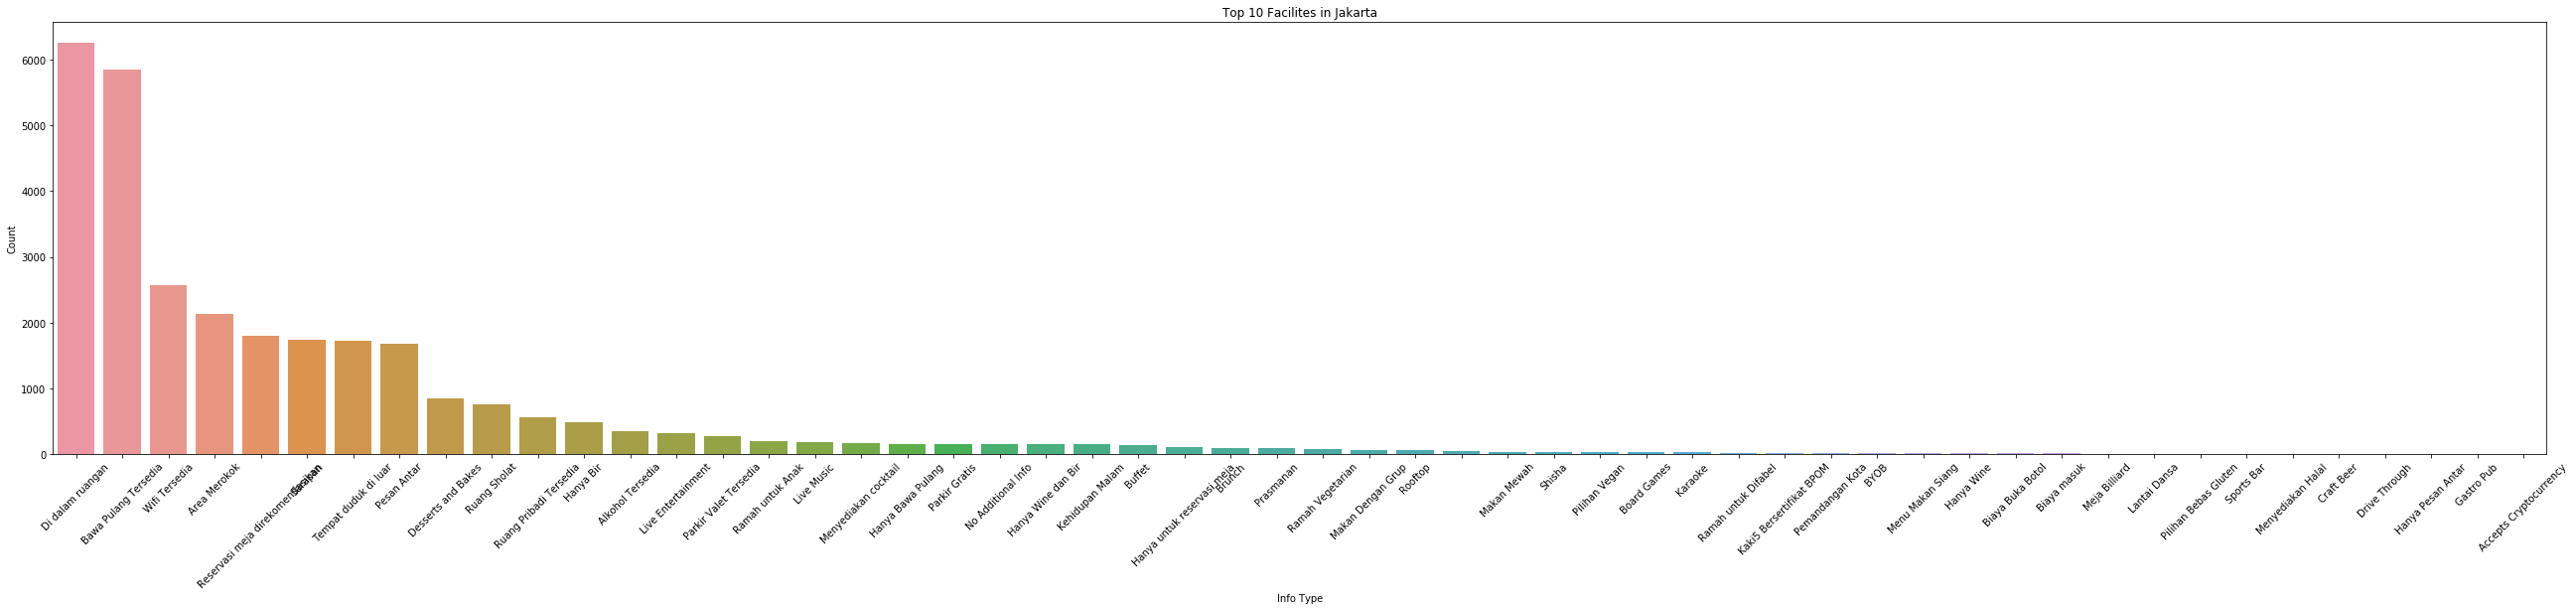

In [53]:
plt.figure(figsize=(45,8))
ax=sns.barplot(x="Info Type", y="Count", data=rdf_info_counts)
ax.set_title('Top 10 Facilites in Jakarta')
plt.xticks(rotation=45)
plt.show()

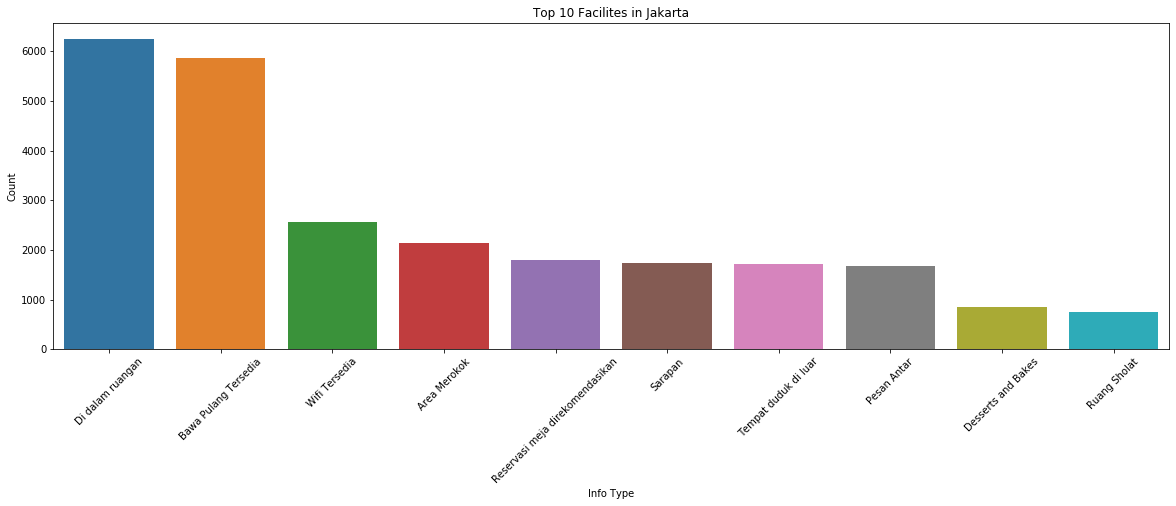

In [54]:
addt_info_top10 = rdf_info_counts[0:10]

plt.figure(figsize=(20,6))
ax=sns.barplot(x="Info Type", y="Count", data=addt_info_top10)
ax.set_title('Top 10 Facilites in Jakarta')
plt.xticks(rotation=45)
plt.show()

In [55]:
def convert_string(row, name): 
    lst = row[name]
    return (','.join(lst))

In [56]:
rdf['NEW Additional Info'] = rdf.apply(lambda row: convert_string(row, 'Additional Info'), axis=1)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()
cv_addt_info=cv.fit_transform(rdf['NEW Additional Info'].str.replace(' ',''))

In [58]:
cv_df= pd.DataFrame(cv_addt_info.todense(),columns=cv.get_feature_names())
cv_df.columns

Index(['acceptscryptocurrency', 'alkoholtersedia', 'areamerokok',
       'bawapulangtersedia', 'biayabukabotol', 'biayamasuk', 'boardgames',
       'brunch', 'buffet', 'byob', 'craftbeer', 'dessertsandbakes',
       'didalamruangan', 'drivethrough', 'gastropub', 'hanyabawapulang',
       'hanyabir', 'hanyapesanantar', 'hanyauntukreservasimeja', 'hanyawine',
       'hanyawinedanbir', 'kaki5bersertifikatbpom', 'karaoke',
       'kehidupanmalam', 'lantaidansa', 'liveentertainment', 'livemusic',
       'makandengangrup', 'makanmewah', 'mejabilliard', 'menumakansiang',
       'menyediakancocktail', 'menyediakanhalal', 'noadditionalinfo',
       'parkirgratis', 'parkirvalettersedia', 'pemandangankota', 'pesanantar',
       'pilihanbebasgluten', 'pilihanvegan', 'prasmanan', 'ramahuntukanak',
       'ramahuntukdifabel', 'ramahvegetarian', 'reservasimejadirekomendasikan',
       'rooftop', 'ruangpribaditersedia', 'ruangsholat', 'sarapan', 'shisha',
       'sportsbar', 'tempatdudukdiluar', 'wifi

In [59]:
# Take Only the Top 30 (>= 40 Restaurants to reduce our features)

cv_df.drop(['pesanantar', 'noadditionalinfo', 'shisha', 'pilihanvegan', 'boardgames', 'karaoke','kaki5bersertifikatbpom', 'ramahuntukdifabel', 'pemandangankota', 'byob', 'menumakansiang', 'hanyawine', 'biayabukabotol', 'biayamasuk', 'lantaidansa', 'mejabilliard', 'pilihanbebasgluten', 'menyediakanhalal', 'sportsbar', 'craftbeer', 'drivethrough', 'acceptscryptocurrency', 'hanyapesanantar', 'gastropub'], axis=1, inplace=True)

In [60]:
#Let's make Revised RDF (vrdf), combining previous RDF dan these one-hot encoding Additional Info DataFrame

vrdf = rdf.join(cv_df)

In [61]:
vrdf

Restaurant Name Restaurant Area  Restaurant Rating  \
0                   Holy Smokes        Senopati                4.4   
1                Pempek Megaria          Cikini                4.3   
2                 Tjikinii Lima          Cikini                4.0   
3             Gado-Gado Bon-Bin          Cikini                4.0   
4                 RM Wong Tegal   Tanjung Duren                3.9   
...                         ...             ...                ...   
6779     Nock Nock Cafe & Resto   Kelapa Gading                2.3   
6780              Abun Takoyaki       Manggarai                3.3   
6781              A Wen Seafood        Jelambar                3.1   
6782              Talaga Kuring          Sentul                2.1   
6783  Tigalima Coffee & Kitchen         Menteng                3.1   

      Restaurant Review  Latitude   Longitude  \
0                  1437 -6.239143  106.807954   
1                   461 -6.199900  106.843739   
2                   391 -6.189802  106.837150   
3                   177 -6.192959  106.838377   
4                    12 -6.182315  106.782992   
...                 ...       ...         ...   
6779                 13 -6.151773  106.891750   
6780                 33 -6.213375  106.854490   
6781                 18 -6.144488  106.787751   
6782                 30 -6.575514  106.864451   
6783                 29 -6.186986  106.830715   

                                                Website  \
0     https://www.zomato.com/id/jakarta/holy-smokes-...   
1     https://www.zomato.com/id/jakarta/pempek-megar...   
2     https://www.zomato.com/id/jakarta/tjikinii-lim...   
3     https://www.zomato.com/id/jakarta/gado-gado-bo...   
4     https://www.zomato.com/id/jakarta/rm-wong-tega...   
...                                                 ...   
6779  https://www.zomato.com/id/jakarta/nock-nock-ca...   
6780  https://www.zomato.com/id/jakarta/abun-takoyak...   
6781  https://www.zomato.com/id/jakarta/a-wen-seafoo...   
6782  https://www.zomato.com/id/jakarta/talaga-kurin...   
6783  https://www.zomato.com/id/jakarta/tigalima-cof...   

                                     Restaurant Address  Price for 2  \
0       Jl. Wolter Monginsidi No. 27, Senopati, Jakarta       500000   
1     Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...        70000   
2             Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
3                   Jl. Cikini 4 No. 5, Cikini, Jakarta        90000   
4     Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...       100000   
...                                                 ...          ...   
6779  Mall of Indonesia, Rukan Resort City Home, Blo...       120000   
6780  Jl. Manggarai Utara 4, Blok D No. 1, Manggarai...        70000   
6781  Komplek Taman Harapan Indah, Jl. Tubagus Angke...       120000   
6782  Komplek Graha Utama, Jl. Bukit Sentul, Sentul,...       250000   
6783     Jl. K.H. Wahid Hasyim No. 35, Menteng, Jakarta       120000   

                                        Additional Info     Province  \
0     [Di dalam ruangan, Hanya Wine dan Bir, Parkir ...  DKI Jakarta   
1              [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
2     [Ruang Pribadi Tersedia, Tempat duduk di luar,...  DKI Jakarta   
3              [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
4     [Bawa Pulang Tersedia, Sarapan, Di dalam ruangan]  DKI Jakarta   
...                                                 ...          ...   
6779  [No Additional Info, Bawa Pulang Tersedia, Sar...  DKI Jakarta   
6780           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
6781  [Bawa Pulang Tersedia, Di dalam ruangan, Pesan...  DKI Jakarta   
6782           [Bawa Pulang Tersedia, Di dalam ruangan]   Jawa Barat   
6783  [Tempat duduk di luar, Di dalam ruangan, Ruang...  DKI Jakarta   

                 City District/Kecamatan Delivery Service  \
0     Jakarta Selatan     Kebayoran Baru               No   
1       Jakarta Pusat    

In [62]:
vrdf.drop(['NEW Additional Info'], axis=1).to_excel("Zomato Restaurants DataFrame - Clean & FeatEng II.xlsx", index=False)
vrdf.drop(['NEW Additional Info'], axis=1).to_csv("Zomato Restaurants DataFrame - Clean & FeatEng II.csv", index=False)

# DATA VISUALIZATION & EXPLORATION

In [63]:
vrdf.head()

Restaurant Name Restaurant Area  Restaurant Rating  Restaurant Review  \
0        Holy Smokes        Senopati                4.4               1437   
1     Pempek Megaria          Cikini                4.3                461   
2      Tjikinii Lima          Cikini                4.0                391   
3  Gado-Gado Bon-Bin          Cikini                4.0                177   
4      RM Wong Tegal   Tanjung Duren                3.9                 12   

   Latitude   Longitude                                            Website  \
0 -6.239143  106.807954  https://www.zomato.com/id/jakarta/holy-smokes-...   
1 -6.199900  106.843739  https://www.zomato.com/id/jakarta/pempek-megar...   
2 -6.189802  106.837150  https://www.zomato.com/id/jakarta/tjikinii-lim...   
3 -6.192959  106.838377  https://www.zomato.com/id/jakarta/gado-gado-bo...   
4 -6.182315  106.782992  https://www.zomato.com/id/jakarta/rm-wong-tega...   

                                  Restaurant Address  Price for 2  \
0    Jl. Wolter Monginsidi No. 27, Senopati, Jakarta       500000   
1  Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...        70000   
2          Jl. Cikini I No. 5, Cikini, Jakarta 10330       300000   
3                Jl. Cikini 4 No. 5, Cikini, Jakarta        90000   
4  Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...       100000   

                                     Additional Info     Province  \
0  [Di dalam ruangan, Hanya Wine dan Bir, Parkir ...  DKI Jakarta   
1           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
2  [Ruang Pribadi Tersedia, Tempat duduk di luar,...  DKI Jakarta   
3           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
4  [Bawa Pulang Tersedia, Sarapan, Di dalam ruangan]  DKI Jakarta   

              City District/Kecamatan Delivery Service       Place Type  \
0  Jakarta Selatan     Kebayoran Baru               No  [Casual Dining]   
1    Jakarta Pusat            Menteng               No    [Quick Bites]   
2    Jakarta Pusat            Menteng               No  [Casual Dining]   
3    Jakarta Pusat            Menteng               No    [Quick Bites]   
4    Jakarta Barat  Grogol Petamburan               No    [Quick Bites]   

  Cuisine Regionality              Cuisines  \
0             [Barat]  [Grill House, Steak]   
1         [Palembang]              [Pempek]   
2  [Indonesia, Barat]                [Kopi]   
3   [Jawa, Indonesia]       [Makanan Sehat]   
4   [Jawa, Indonesia]               [Satay]   

                                 NEW Additional Info  alkoholtersedia  \
0  Di dalam ruangan,Hanya Wine dan Bir,Parkir Val...                0   
1              Bawa Pulang Tersedia,Di dalam ruangan                0   
2  Ruang Pribadi Tersedia,Tempat duduk di luar,Di...                0   
3              Bawa Pulang Tersedia,Di dalam ruangan                0   
4      Bawa Pulang Tersedia,Sarapan,Di dalam ruangan                0   

   areamerokok  bawapulangtersedia  brunch  buffet  dessertsandbakes  \
0            0                   0       0       0                 0   
1            0                   1       0       0                 0   
2            1                   1       0       0                 0   
3            0                   1       0       0                 0   
4            0                   1       0       0                 0   

   didalamruangan  hanyabawapulang  hanyabir  hanyauntukreservasimeja  \
0               1                0         0                        0   
1               1                0         0                        0   
2               1                0         0                        0   
3               1                0         0                        0   
4               1                0         0                        0   

   hanyawinedanbir  kehidupanmalam  liveentertainment  livemusic  \
0                1               0                  0          0   
1                0               0                  0   

In [64]:
vrdf['City'].unique()

array(['Jakarta Selatan', 'Jakarta Pusat', 'Jakarta Barat',
       'Jakarta Utara', 'Tangerang Selatan', 'Tangerang Kabupaten',
       'Bekasi Kota', 'Tangerang Kota', 'Jakarta Timur', 'Bogor Kota',
       'Bogor Kabupaten', 'Cianjur', 'Bekasi Kabupaten', 'Depok',
       'Tangerang'], dtype=object)

# RESTAURANT QUANTITY

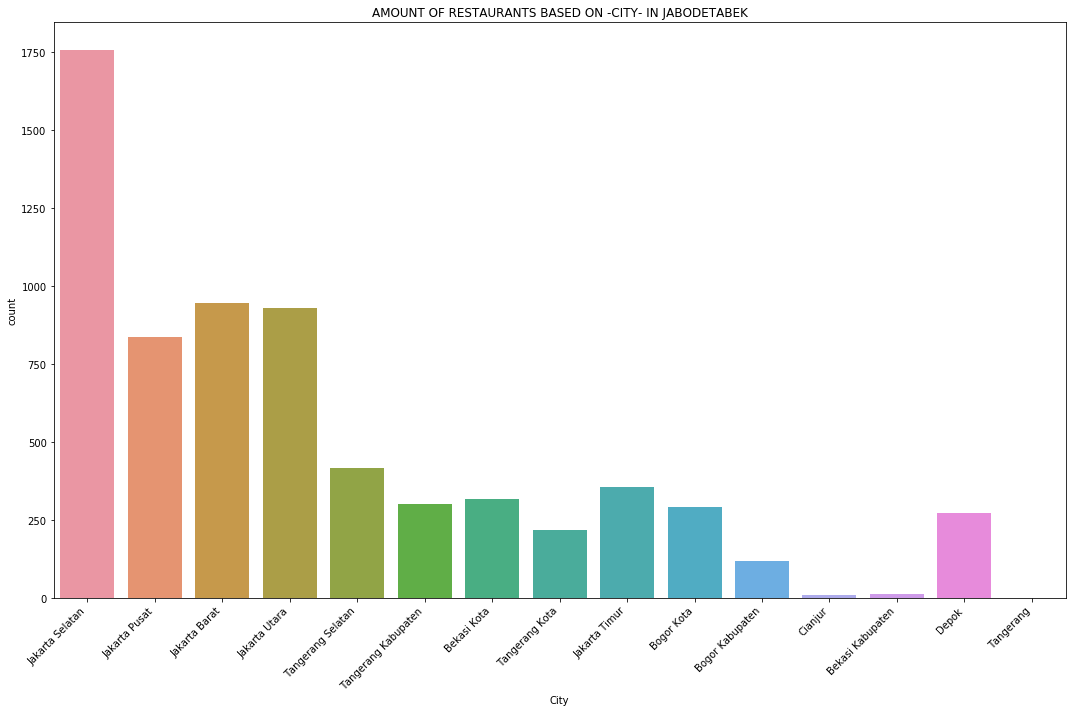

In [65]:
#Restaurant groupby city
plt.figure(figsize=(15,10))
ax = sns.countplot(x="City", data=vrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('AMOUNT OF RESTAURANTS BASED ON -CITY- IN JABODETABEK')
plt.tight_layout()
plt.show()

In [66]:
#Percentage restaurant groupby city
df_counts=vrdf['City'].value_counts()
x=df_counts.values
y=df_counts.keys()
fig = px.pie(df_counts, values=x, names=y, title='PERCENTAGE RESTAURANTS BY -CITY- IN JABODETABEK')
fig.show()

In [67]:
#Percentage restaurant groupby city in DKI Jakarta
df_counts=vrdf[vrdf['Province'] == 'DKI Jakarta']['City'].value_counts()
x=df_counts.values
y=df_counts.keys()
fig = px.pie(df_counts, values=x, names=y, title='PERCENTAGE RESTAURANTS BY -CITY- IN DKI JAKARTA')
fig.show()

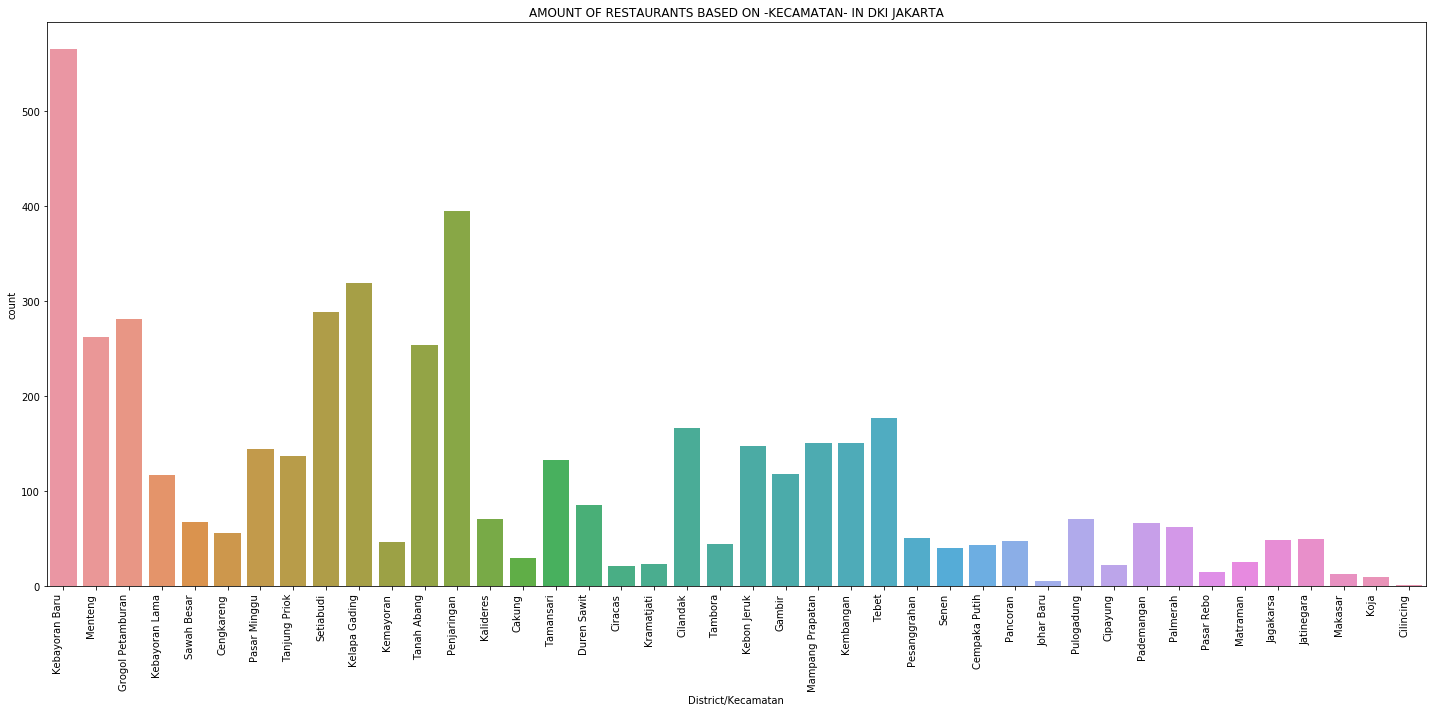

In [68]:
#Restaurant groupby Kecamatan in DKI Jakarta
plt.figure(figsize=(20,10))
ax = sns.countplot(x="District/Kecamatan", data=vrdf[vrdf['Province']=='DKI Jakarta'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title('AMOUNT OF RESTAURANTS BASED ON -KECAMATAN- IN DKI JAKARTA')
plt.tight_layout()
plt.show()



In [69]:
vrdf['Price for 2'] = vrdf['Price for 2'] / 10000
vrdf.rename(columns={'Price for 2':'Price for 2 (*10K)'}, inplace=True)

In [70]:
vrdf.describe()

Restaurant Rating  Restaurant Review     Latitude    Longitude  \
count        6784.000000        6784.000000  6784.000000  6784.000000   
mean            3.535628          87.231574    -6.241331   106.807617   
std             0.455552         224.340325     0.108503     0.106970   
min             2.000000           4.000000    -7.247999   106.570949   
25%             3.200000           8.750000    -6.269332   106.779415   
50%             3.600000          21.000000    -6.225006   106.811950   
75%             3.800000          63.000000    -6.173597   106.842258   
max             4.900000        5742.000000    -6.090490   112.777749   

       Price for 2 (*10K)  alkoholtersedia  areamerokok  bawapulangtersedia  \
count         6784.000000      6784.000000  6784.000000         6784.000000   
mean            14.870106         0.051592     0.315153            0.863060   
std             13.665685         0.221218     0.464611            0.343809   
min              1.500000         0.000000     0.000000            0.000000   
25%              8.000000         0.000000     0.000000            1.000000   
50%             10.000000         0.000000     0.000000            1.000000   
75%             18.000000         0.000000     1.000000            1.000000   
max            350.000000         1.000000     1.000000            1.000000   

            brunch       buffet  dessertsandbakes  didalamruangan  \
count  6784.000000  6784.000000       6784.000000     6784.000000   
mean      0.013561     0.020489          0.124558        0.922022   
std       0.115669     0.141678          0.330241        0.268156   
min       0.000000     0.000000          0.000000        0.000000   
25%       0.000000     0.000000          0.000000        1.000000   
50%       0.000000     0.000000          0.000000        1.000000   
75%       0.000000     0.000000          0.000000        1.000000   
max       1.000000     1.000000          1.000000        1.000000   

       hanyabawapulang     hanyabir  hanyauntukreservasimeja  hanyawinedanbir  \
count      6784.000000  6784.000000              6784.000000      6784.000000   
mean          0.023732     0.072229                 0.015920         0.022258   
std           0.152225     0.258885                 0.125175         0.147533   
min           0.000000     0.000000                 0.000000         0.000000   
25%           0.000000     0.000000                 0.000000         0.000000   
50%           0.000000     0.000000                 0.000000         0.000000   
75%           0.000000     0.000000                 0.000000         0.000000   
max           1.000000     1.000000                 1.000000         1.000000   

       kehidupanmalam  liveentertainment   livemusic  makandengangrup  \
count     6784.000000        6784.000000  6784.00000      6784.000000   
mean         0.021816           0.047022     0.02668         0.009876   
std          0.146093           0.211702     0.16116         0.098894   
min          0.000000           0.000000     0.00000         0.000000   
25%          0.000000           0.000000     0.00000         0.000000   
50%          0.000000           0.000000     0.00000         0.000000   
75%          0.000000           0.000000     0.00000         0.000000   
max          1.000000           1.000000     1.00000         1.000000   

        makanmewah  menyediakancocktail  parkirgratis  parkirvalettersedia  \
count  6784.000000          6784.000000   6784.000000          6784.000000   
mean      0.005896             0.024469      0.023290             0.041568   
std       0.076566             0.154512      0.150834             0.199615   
min       0.000000             0.000000      0.000000             0.000000   
25%       0.000000             0.000000      0.000000             0.000000   
50%       0.000000             0.000000      0.000000             0.000000   
75%       0.000000             0.000000      0.000000             0.000000   
max

# PLACE TYPE DISTRIBUTION

In [71]:
place_type = ['Quick Bites', 'Casual Dining', 'Kafe', 'Food Court', 'Toko Minuman', 'Toko Kue & Roti', 'Dessert Parlor', 'Kaki Lima', 'Bar', 'Kios', 'Lounge', 'Fine Dining']

In [72]:
city_list_jkt = ['Jakarta Selatan', 'Jakarta Pusat', 'Jakarta Barat', 'Jakarta Utara', 'Jakarta Timur',]

In [73]:
# Make A New List to store the Restaurant Type Counts

idx = 1
ct = len(place_type)
place_type_ct = []
city_list_rev = []

# Type = List
for i in city_list_jkt:

    for j in range(idx, idx+ct):
        city_list_rev.append(i)
    idx += ct

    for k in place_type:
        count = sum(vrdf[vrdf['City'] == i]['Place Type'].apply(lambda x: k in x))
        place_type_ct.append(count)

place_type_rev = place_type*len(city_list_jkt)

In [74]:
jkt_placedf = pd.DataFrame({'City': city_list_rev, 'Cuisines': place_type_rev, 'Cuisines Count': place_type_ct})
jkt_placedf.head()

City       Cuisines  Cuisines Count
0  Jakarta Selatan    Quick Bites             617
1  Jakarta Selatan  Casual Dining             514
2  Jakarta Selatan           Kafe             416
3  Jakarta Selatan     Food Court              84
4  Jakarta Selatan   Toko Minuman              87

In [75]:
trace = [

    go.Bar( x=jkt_placedf[jkt_placedf['City'] == 'Jakarta Pusat']['Cuisines'], 
            y=jkt_placedf[jkt_placedf['City'] == 'Jakarta Pusat']['Cuisines Count'],
            visible=True,
            opacity=0.5,
            name= 'Jakarta Pusat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_placedf[jkt_placedf['City'] == 'Jakarta Utara']['Cuisines'], 
            y=jkt_placedf[jkt_placedf['City'] == 'Jakarta Utara']['Cuisines Count'],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Utara',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),
    
    go.Bar( x=jkt_placedf[jkt_placedf['City'] == 'Jakarta Selatan']['Cuisines'], 
            y=jkt_placedf[jkt_placedf['City'] == 'Jakarta Selatan']['Cuisines Count'],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Selatan',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_placedf[jkt_placedf['City'] == 'Jakarta Barat']['Cuisines'], 
            y=jkt_placedf[jkt_placedf['City'] == 'Jakarta Barat']['Cuisines Count'],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Barat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),

    go.Bar( x=jkt_placedf[jkt_placedf['City'] == 'Jakarta Timur']['Cuisines'], 
            y=jkt_placedf[jkt_placedf['City'] == 'Jakarta Timur']['Cuisines Count'],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Timur',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

]


layout = go.Layout(autosize=True,
                   #height=800,
                   #width=900,
                   xaxis=dict(title="Restaurant Place Types Available in DKI JKT",
                             titlefont=dict(size=15,),
                             tickmode="linear",),
                   yaxis=dict(title="Count of Restaurants",
                             titlefont=dict(size=15,),),
                  )


updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False, False]}],
            label="Jakarta Pusat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False, False]}],
            label="Jakarta Utara",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False, False]}],
            label="Jakarta Selatan",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True, False]}],
            label="Jakarta Barat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, True]}],
            label="Jakarta Timur",
            method='update',
        ),
    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.3,
        yanchor='top',
    ),
])


layout['updatemenus'] = updatemenus

fig = dict(data=trace, layout=layout)
iplot(fig)

# CUISINES DISTRIBUTION

In [88]:
cuisine_type = []

#Type = List
for index, row in vrdf.iterrows():
    final = row['Cuisines']
    cuisine_type.extend(final)

cuisine_type = list(set(cuisine_type))

In [90]:
len(cuisine_type)

35

In [91]:
# Make A New List to store the Cuisine Type Counts

idx = 1
ct = len(cuisine_type)
cuisine_type_ct = []
city_list_rev = []

# Type = List
for i in city_list_jkt:

    for j in range(idx, idx+ct):
        city_list_rev.append(i)
    idx += ct

    for k in cuisine_type:
        count = sum(vrdf[vrdf['City'] == i]['Cuisines'].apply(lambda x: k in x))
        cuisine_type_ct.append(count)

cuisine_type_rev = cuisine_type*len(city_list_jkt)

In [108]:
jkt_cuisinedf = pd.DataFrame({'City': city_list_rev, 'Category': cuisine_type_rev, 'Category Count': cuisine_type_ct})
jkt_cuisinedf.head()

City    Category  Category Count
0  Jakarta Selatan     Seafood              47
1  Jakarta Selatan  Bubble Tea              10
2  Jakarta Selatan         Tea             115
3  Jakarta Selatan       Sushi              37
4  Jakarta Selatan        Deli               9

In [116]:
trace = [

    go.Bar( x=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Pusat'].sort_values('Category Count', ascending=False)['Category'][2:17], 
            y=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Pusat'].sort_values('Category Count', ascending=False)['Category Count'][2:17],
            visible=True,
            opacity=0.5,
            name= 'Jakarta Pusat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Utara'].sort_values('Category Count', ascending=False)['Category'][2:17], 
            y=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Utara'].sort_values('Category Count', ascending=False)['Category Count'][2:17],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Utara',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),
    
    go.Bar( x=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Selatan'].sort_values('Category Count', ascending=False)['Category'][2:17], 
            y=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Selatan'].sort_values('Category Count', ascending=False)['Category Count'][2:17],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Selatan',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Barat'].sort_values('Category Count', ascending=False)['Category'][2:17], 
            y=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Barat'].sort_values('Category Count', ascending=False)['Category Count'][2:17],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Barat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),

    go.Bar( x=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Timur'].sort_values('Category Count', ascending=False)['Category'][2:17], 
            y=jkt_cuisinedf[jkt_cuisinedf['City'] == 'Jakarta Timur'].sort_values('Category Count', ascending=False)['Category Count'][2:17],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Timur',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

]


layout = go.Layout(autosize=True,
                   #height=800,
                   #width=900,
                   xaxis=dict(title="Top 15 Cuisines Available in DKI JKT (Other than Coffee & Drinks)",
                             titlefont=dict(size=15,),
                             tickmode="linear",),
                   yaxis=dict(title="Count of Restaurants",
                             titlefont=dict(size=15,),),
                  )


updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False, False]}],
            label="Jakarta Pusat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False, False]}],
            label="Jakarta Utara",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False, False]}],
            label="Jakarta Selatan",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True, False]}],
            label="Jakarta Barat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, True]}],
            label="Jakarta Timur",
            method='update',
        ),
    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.3,
        yanchor='top',
    ),
])


layout['updatemenus'] = updatemenus

fig = dict(data=trace, layout=layout)
iplot(fig)

# REGIONALITY DISTRIBUTION

In [117]:
region_type = []

#Type = List
for index, row in vrdf.iterrows():
    final = row['Cuisine Regionality']
    region_type.extend(final)

region_type = list(set(region_type))

In [118]:
len(region_type)

54

In [119]:
# Make A New List to store the Regionality Type Counts

idx = 1
ct = len(region_type)
region_type_ct = []
city_list_rev = []

# Type = List
for i in city_list_jkt:

    for j in range(idx, idx+ct):
        city_list_rev.append(i)
    idx += ct

    for k in region_type:
        count = sum(vrdf[vrdf['City'] == i]['Cuisine Regionality'].apply(lambda x: k in x))
        region_type_ct.append(count)

region_type_rev = region_type*len(city_list_jkt)

In [120]:
jkt_regiondf = pd.DataFrame({'City': city_list_rev, 'Category': region_type_rev, 'Category Count': region_type_ct})
jkt_regiondf.head()

City     Category  Category Count
0  Jakarta Selatan    Peranakan              10
1  Jakarta Selatan       Maroko               1
2  Jakarta Selatan       Jepang             152
3  Jakarta Selatan  Kontinental               5
4  Jakarta Selatan        Eropa              34

In [122]:
trace = [

    go.Bar( x=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Pusat'].sort_values('Category Count', ascending=False)['Category'][1:16], 
            y=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Pusat'].sort_values('Category Count', ascending=False)['Category Count'][1:16],
            visible=True,
            opacity=0.5,
            name= 'Jakarta Pusat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Utara'].sort_values('Category Count', ascending=False)['Category'][1:16], 
            y=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Utara'].sort_values('Category Count', ascending=False)['Category Count'][1:16],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Utara',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),
    
    go.Bar( x=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Selatan'].sort_values('Category Count', ascending=False)['Category'][1:16], 
            y=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Selatan'].sort_values('Category Count', ascending=False)['Category Count'][1:16],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Selatan',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

    go.Bar( x=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Barat'].sort_values('Category Count', ascending=False)['Category'][1:16], 
            y=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Barat'].sort_values('Category Count', ascending=False)['Category Count'][1:16],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Barat',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(175, 200, 196)')
            ),

    go.Bar( x=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Timur'].sort_values('Category Count', ascending=False)['Category'][1:16], 
            y=jkt_regiondf[jkt_regiondf['City'] == 'Jakarta Timur'].sort_values('Category Count', ascending=False)['Category Count'][1:16],
            visible=False,
            opacity=0.5,
            name= 'Jakarta Timur',
            marker=dict(line=dict(  width=1.6,
                                    color='rgb(75,75,75)',),
                                    color='rgb(158,202,225)')
            ),

]


layout = go.Layout(autosize=True,
                   #height=800,
                   #width=900,
                   xaxis=dict(title="Top 15 Regionality Available in DKI JKT (Other than Indonesia)",
                             titlefont=dict(size=15,),
                             tickmode="linear",),
                   yaxis=dict(title="Count of Restaurants",
                             titlefont=dict(size=15,),),
                  )


updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False, False]}],
            label="Jakarta Pusat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False, False]}],
            label="Jakarta Utara",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False, False]}],
            label="Jakarta Selatan",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True, False]}],
            label="Jakarta Barat",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, True]}],
            label="Jakarta Timur",
            method='update',
        ),
    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.3,
        yanchor='top',
    ),
])


layout['updatemenus'] = updatemenus

fig = dict(data=trace, layout=layout)
iplot(fig)

# RESTAURANT RATING

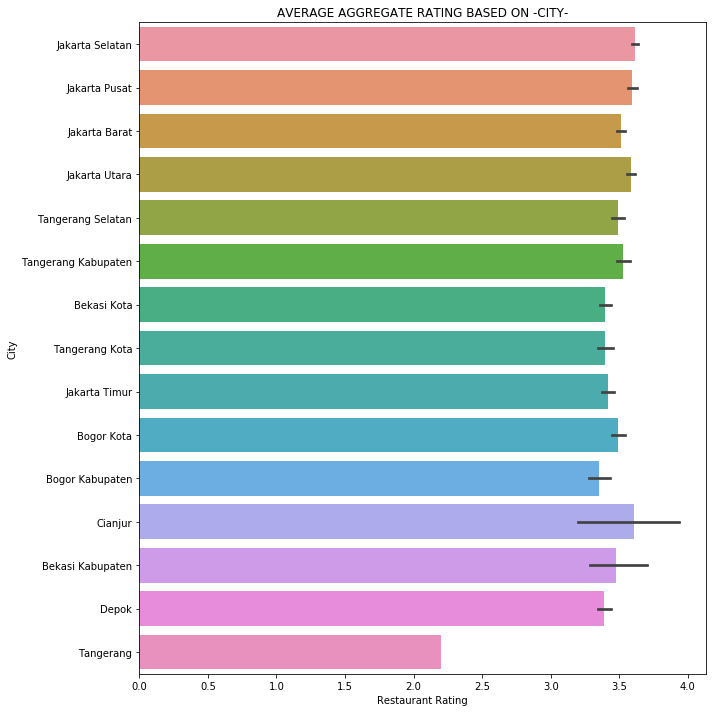

In [76]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=vrdf,x='Restaurant Rating',y='City')
ax.set_title('AVERAGE AGGREGATE RATING BASED ON -CITY-')
plt.tight_layout()
plt.show()

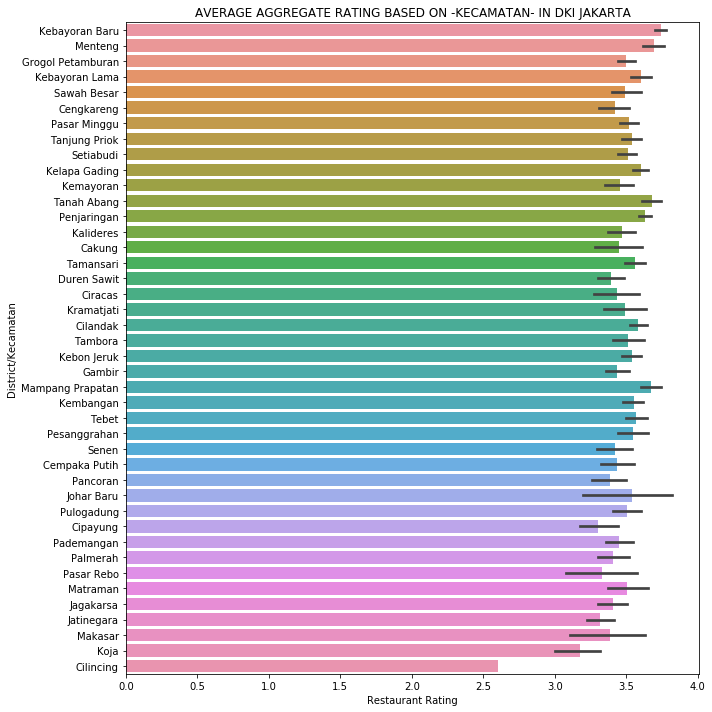

In [77]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=vrdf[vrdf['Province']=='DKI Jakarta'],x='Restaurant Rating',y='District/Kecamatan')
ax.set_title('AVERAGE AGGREGATE RATING BASED ON -KECAMATAN- IN DKI JAKARTA')
plt.tight_layout()
plt.show()

# PRICE FOR 2

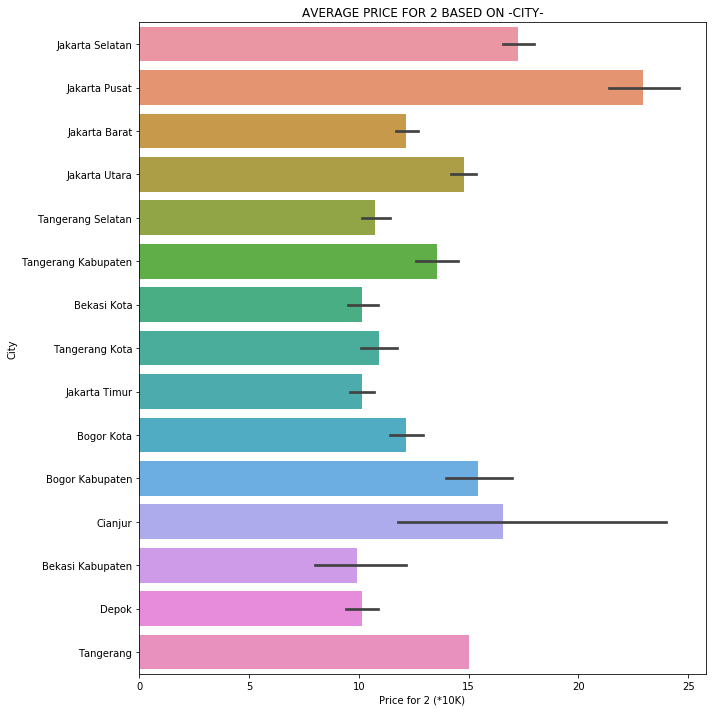

In [78]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=vrdf,x='Price for 2 (*10K)',y='City')
ax.set_title('AVERAGE PRICE FOR 2 BASED ON -CITY-')
plt.tight_layout()
plt.show()

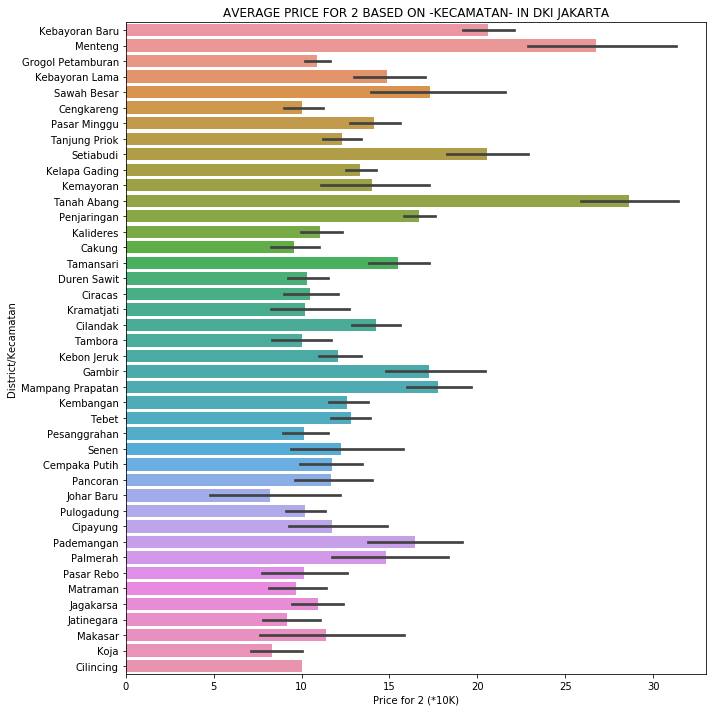

In [79]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=vrdf[vrdf['Province']=='DKI Jakarta'],x='Price for 2 (*10K)',y='District/Kecamatan')
ax.set_title('AVERAGE PRICE FOR 2 BASED ON -KECAMATAN- IN DKI JAKARTA')
plt.tight_layout()
plt.show()

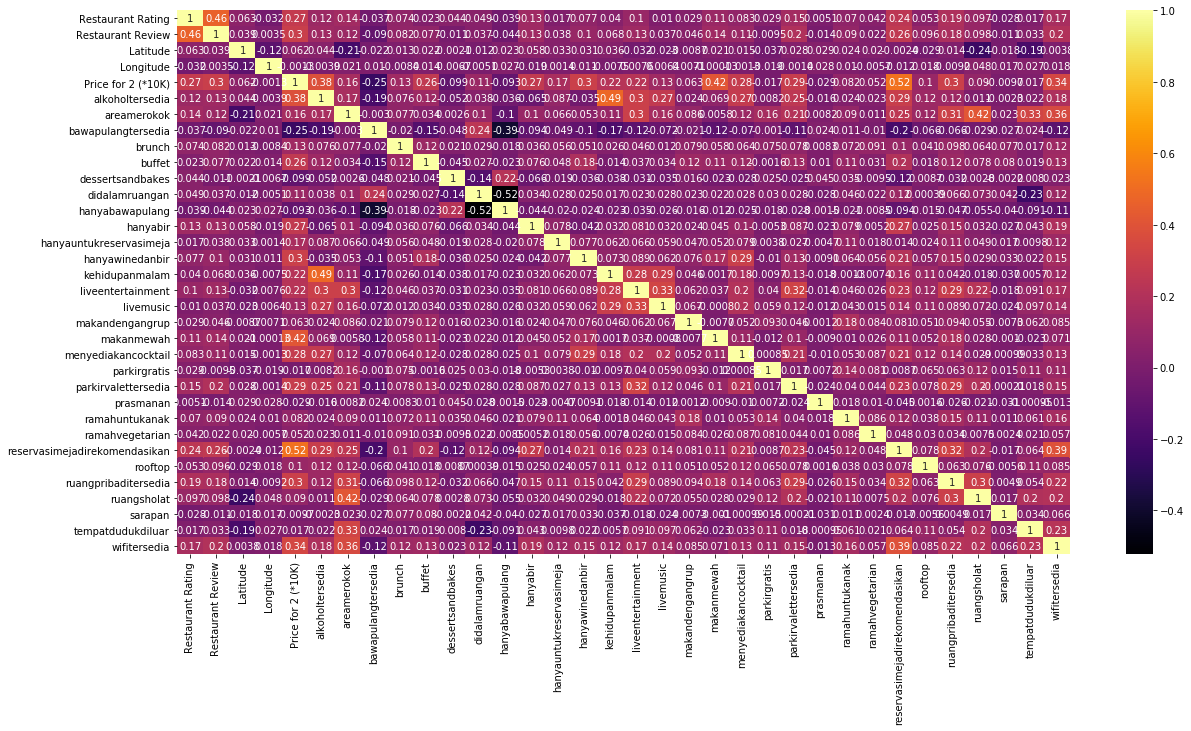

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(vrdf.corr(),annot=True,cmap='inferno')
plt.show()

In [81]:
fig = go.Figure(go.Densitymapbox(lat=vrdf.Latitude, lon=vrdf.Longitude, z=vrdf['Price for 2 (*10K)'],radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [82]:
#Top 5 cheapest restaurant on Zomato
fig = px.bar(vrdf.sort_values(by='Price for 2 (*10K)',ascending=True).head(5), y='Price for 2 (*10K)', x='Restaurant Name',hover_data=['Province','City'])
fig.update_layout(title="Top 5 Cheapest Restaurants on Zomato Jabodetabek")
fig.show()

In [83]:
#Top 5 most expensive restaurant on Zomato
fig = px.bar(vrdf.sort_values(by='Price for 2 (*10K)',ascending=False).head(5), y='Price for 2 (*10K)', x='Restaurant Name',hover_data=['Province','City'])
fig.update_layout(title="Top 5 Most Expensive Restaurants on Jabodetabek")
fig.show()



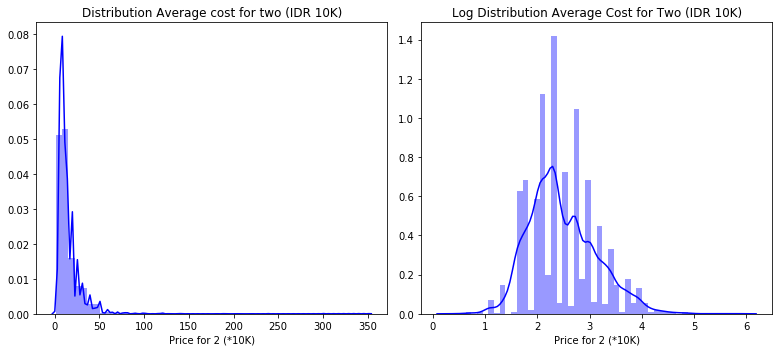

In [84]:
fig=plt.figure(figsize=(11,5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Distribution Average cost for two (IDR 10K)")
sns.distplot(vrdf["Price for 2 (*10K)"], color = "b")
ax = fig.add_subplot(1,2,2)
sns.distplot(np.log(vrdf["Price for 2 (*10K)"]),color="b")
ax.set_title('Log Distribution Average Cost for Two (IDR 10K)')
fig.tight_layout()  
plt.show()

# AGGREGATE RATING

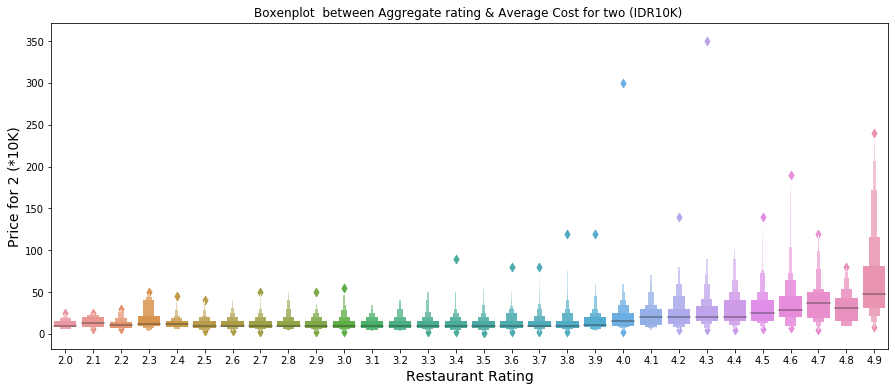

In [85]:
f, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.boxenplot(x = "Restaurant Rating", y = "Price for 2 (*10K)", data = vrdf, ax = ax)
ax.set_xlabel("Restaurant Rating", fontsize = 14)
ax.set_ylabel("Price for 2 (*10K)", fontsize = 14)
ax.set_title("Boxenplot  between Aggregate rating & Average Cost for two (IDR10K) ")
plt.show()

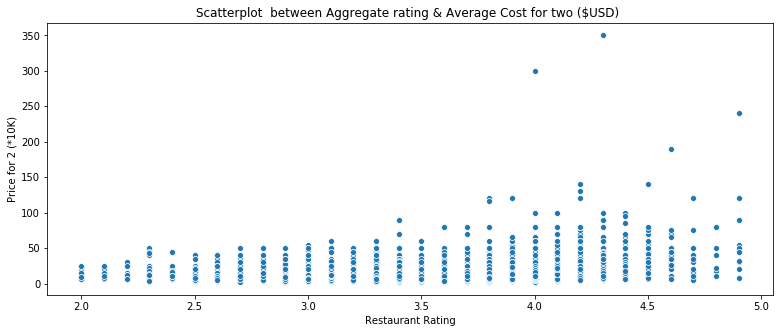

In [86]:
plt.figure(figsize=(13,5))
ax=sns.scatterplot(x = "Restaurant Rating", y = "Price for 2 (*10K)", data = vrdf)
ax.set_title("Scatterplot  between Aggregate rating & Average Cost for two ($USD) ")
plt.show()

# RESTAURANT REVIEW

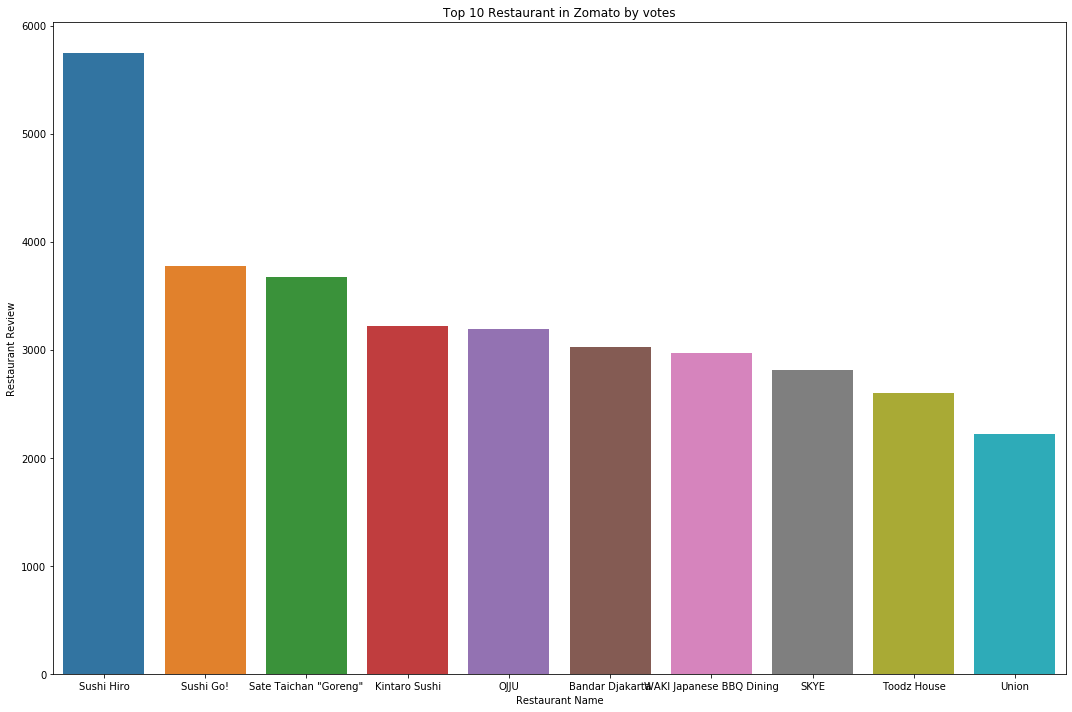

In [87]:
#Create dataframe to count votes
dfvote=vrdf.sort_values(by='Restaurant Review',ascending=False)
dfvote.reset_index(drop=True,inplace=True)
#Take only top 10 data
dfvote=dfvote.head(10)
plt.figure(figsize=(15,10))
ax=sns.barplot(x="Restaurant Name", y="Restaurant Review", data=dfvote)
ax.set_title('Top 10 Restaurant in Zomato by votes')
plt.tight_layout()
plt.show()

# ADDITIONAL INFO

In [123]:
vrdf.head()

Restaurant Name Restaurant Area  Restaurant Rating  Restaurant Review  \
0        Holy Smokes        Senopati                4.4               1437   
1     Pempek Megaria          Cikini                4.3                461   
2      Tjikinii Lima          Cikini                4.0                391   
3  Gado-Gado Bon-Bin          Cikini                4.0                177   
4      RM Wong Tegal   Tanjung Duren                3.9                 12   

   Latitude   Longitude                                            Website  \
0 -6.239143  106.807954  https://www.zomato.com/id/jakarta/holy-smokes-...   
1 -6.199900  106.843739  https://www.zomato.com/id/jakarta/pempek-megar...   
2 -6.189802  106.837150  https://www.zomato.com/id/jakarta/tjikinii-lim...   
3 -6.192959  106.838377  https://www.zomato.com/id/jakarta/gado-gado-bo...   
4 -6.182315  106.782992  https://www.zomato.com/id/jakarta/rm-wong-tega...   

                                  Restaurant Address  Price for 2 (*10K)  \
0    Jl. Wolter Monginsidi No. 27, Senopati, Jakarta                50.0   
1  Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...                 7.0   
2          Jl. Cikini I No. 5, Cikini, Jakarta 10330                30.0   
3                Jl. Cikini 4 No. 5, Cikini, Jakarta                 9.0   
4  Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...                10.0   

                                     Additional Info     Province  \
0  [Di dalam ruangan, Hanya Wine dan Bir, Parkir ...  DKI Jakarta   
1           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
2  [Ruang Pribadi Tersedia, Tempat duduk di luar,...  DKI Jakarta   
3           [Bawa Pulang Tersedia, Di dalam ruangan]  DKI Jakarta   
4  [Bawa Pulang Tersedia, Sarapan, Di dalam ruangan]  DKI Jakarta   

              City District/Kecamatan Delivery Service       Place Type  \
0  Jakarta Selatan     Kebayoran Baru               No  [Casual Dining]   
1    Jakarta Pusat            Menteng               No    [Quick Bites]   
2    Jakarta Pusat            Menteng               No  [Casual Dining]   
3    Jakarta Pusat            Menteng               No    [Quick Bites]   
4    Jakarta Barat  Grogol Petamburan               No    [Quick Bites]   

  Cuisine Regionality              Cuisines  \
0             [Barat]  [Grill House, Steak]   
1         [Palembang]              [Pempek]   
2  [Indonesia, Barat]                [Kopi]   
3   [Jawa, Indonesia]       [Makanan Sehat]   
4   [Jawa, Indonesia]               [Satay]   

                                 NEW Additional Info  alkoholtersedia  \
0  Di dalam ruangan,Hanya Wine dan Bir,Parkir Val...                0   
1              Bawa Pulang Tersedia,Di dalam ruangan                0   
2  Ruang Pribadi Tersedia,Tempat duduk di luar,Di...                0   
3              Bawa Pulang Tersedia,Di dalam ruangan                0   
4      Bawa Pulang Tersedia,Sarapan,Di dalam ruangan                0   

   areamerokok  bawapulangtersedia  brunch  buffet  dessertsandbakes  \
0            0                   0       0       0                 0   
1            0                   1       0       0                 0   
2            1                   1       0       0                 0   
3            0                   1       0       0                 0   
4            0                   1       0       0                 0   

   didalamruangan  hanyabawapulang  hanyabir  hanyauntukreservasimeja  \
0               1                0         0                        0   
1               1                0         0                        0   
2               1                0         0                        0   
3               1                0         0                        0   
4               1                0         0                        0   

   hanyawinedanbir  kehidupanmalam  liveentertainment  livemusic  \
0                1               0                  0          0   
1             

Text(0.5, 1.0, "Box Plot of Price vs 'HanyaUntukReservasiMeja'")

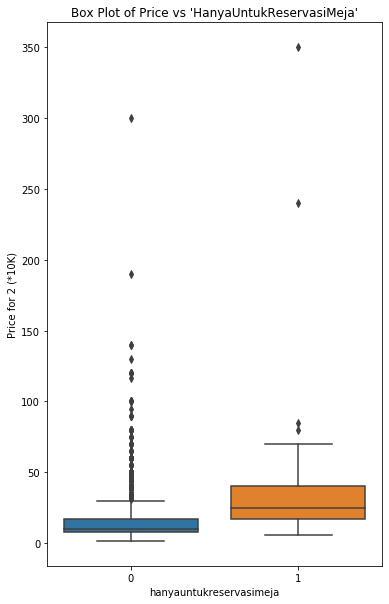

In [143]:
plt.figure(figsize=(6,10))
sns.boxplot(x="hanyauntukreservasimeja", y="Price for 2 (*10K)", data=vrdf)
plt.ylabel('Price for 2 (*10K)')
plt.title("Box Plot of Price vs 'HanyaUntukReservasiMeja'")

Text(0.5, 1.0, "Box Plot of Price vs 'ParkirValetTersedia'")

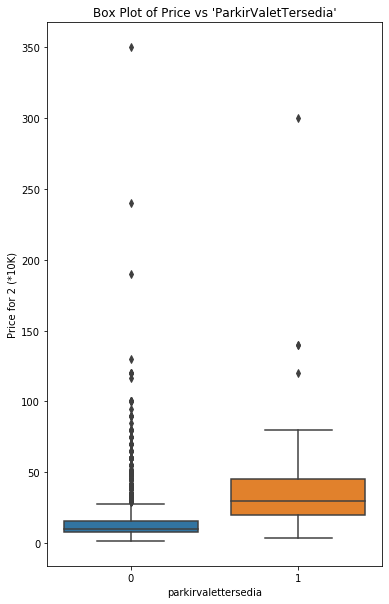

In [144]:
plt.figure(figsize=(6,10))
sns.boxplot(x="parkirvalettersedia", y="Price for 2 (*10K)", data=vrdf)
plt.ylabel('Price for 2 (*10K)')
plt.title("Box Plot of Price vs 'ParkirValetTersedia'")

Text(0.5, 1.0, "Box Plot of Price vs 'HanyaBawaPulang'")

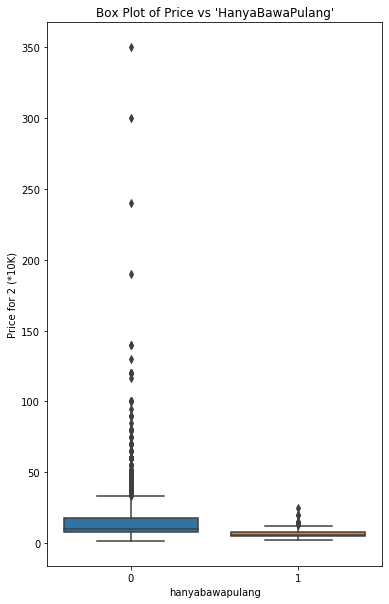

In [145]:
plt.figure(figsize=(6,10))
sns.boxplot(x="hanyabawapulang", y="Price for 2 (*10K)", data=vrdf)
plt.ylabel('Price for 2 (*10K)')
plt.title("Box Plot of Price vs 'HanyaBawaPulang'")